Data Analysis to see which variables affects the price of car using: 
 - Basic analysis on catergorical variables
 - Correlation Analysis
 - Linear Regression Model
 - Train-Test Split prediction 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#Basic statistics on numerical variables
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#Basic statistics on object (categorical) variables
df.describe(include='O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [9]:
#The data set has a mixture of object, float, integer type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
#Dataset does not contain missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
#Dataset does not have duplicated values/rows
df.loc[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
#The 'CarName' column is a combination of the car brand name with the model
df['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [15]:
#Seperate the brand name and model name for better analysis
CarBrand = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3, 'CarBrand', CarBrand)
df.drop(['CarName'],axis=1,inplace =True)
df.head()

,car_ID,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [52]:
df['CarBrand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarBrand, dtype: int64

In [53]:
#Looks like there are some spelling error on some brand names
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
#We will clean the data by fixing the spelling errors
df['CarBrand'] = df['CarBrand'].str.replace('maxda', 'mazda')
df['CarBrand'] = df['CarBrand'].str.replace('porcshce', 'porsche')
df['CarBrand'] = df['CarBrand'].str.replace('toyouta', 'toyota')
df['CarBrand'] = df['CarBrand'].str.replace('vokswagen', 'volkswagen')
df['CarBrand'] = df['CarBrand'].str.replace('vw', 'volkswagen')

df['CarBrand'] = df['CarBrand'].str.lower()
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [61]:
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Basic analysis on car brands

C:\Users\yguan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


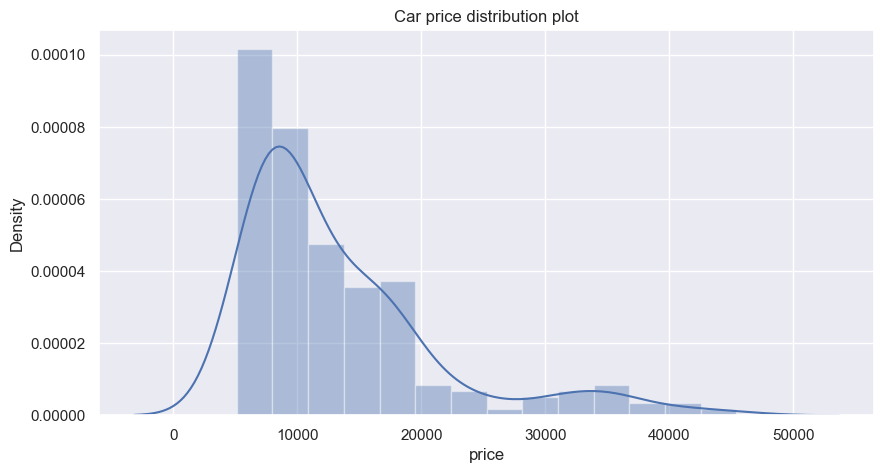

In [17]:
plt.figure(figsize=(10,5))

plt.title('Car price distribution plot')
sns.distplot(df.price)

plt.show()

The distribution is right skewed meaning that most of the car prices are below 20,000  

In [56]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [18]:
#Average price of cars
df['price'].median()

10295.0

In [58]:
print(df.price.describe(percentiles=[0.25, 0.50, 0.75, 0.85, 0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


When looking at the percentiles,
 - 85% of car prices are below 18,500 
 - 90% of car prices are below 22,563
 - Most expensive car (Max) is 45,400

In [19]:
#Let's see which brand has the most expensive price
brand_price = df[['CarBrand','price']]
brand_price_sum = brand_price.groupby('CarBrand')['price'].mean()

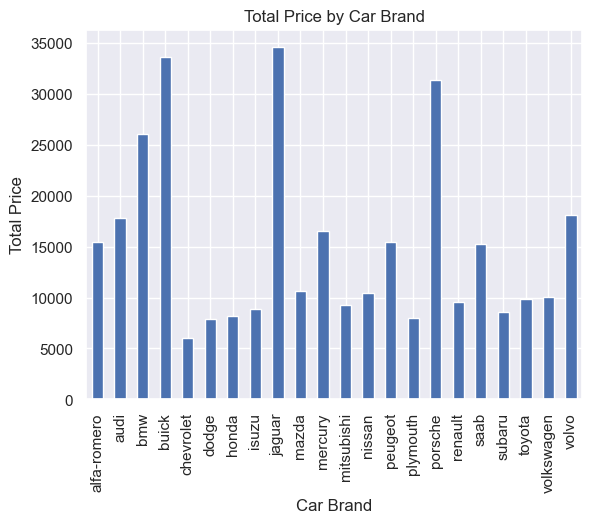

In [20]:
brand_price_sum.plot(kind='bar', x='CarBrand', y='price')
plt.xlabel('Car Brand')
plt.ylabel('Total Price')
plt.title('Total Price by Car Brand')
plt.show()

 - Jaguar, buick, porsche sells the most expensive cars 

In [63]:
brand_price_sum

CarBrand
alfa-romero    15498.333333
audi           17859.166714
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.500000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [62]:
df['CarBrand'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarBrand, dtype: int64

* toyota, nissan, and mazda are the top 3 highest selling cars

### Correlation and Linear Regression Analysis to determine variables that affect price

In [26]:
#First we can see the correlation strength of different columns to price
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

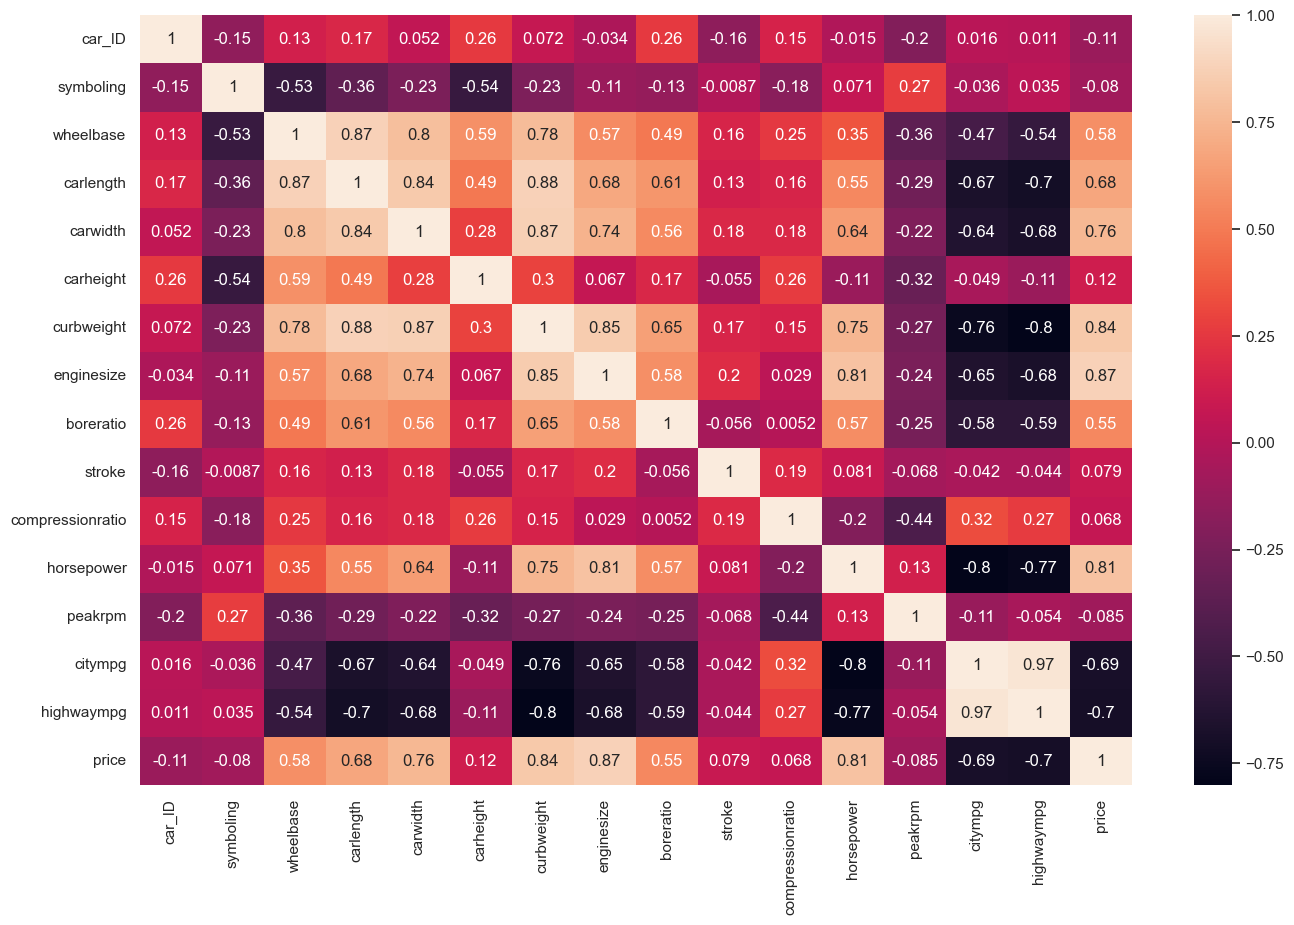

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

In [27]:
#Let's only look at the price to see and analyze better
corr_matrix = df.corr()
price_corr = corr_matrix['price'].drop('price')
price_corr

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

We can see that
 - Some columns have a correlation above 0.5 (positive correlation)
 - car_ID, symboling, peakrpm, citympg, highwaympg columns has negative correlation with price

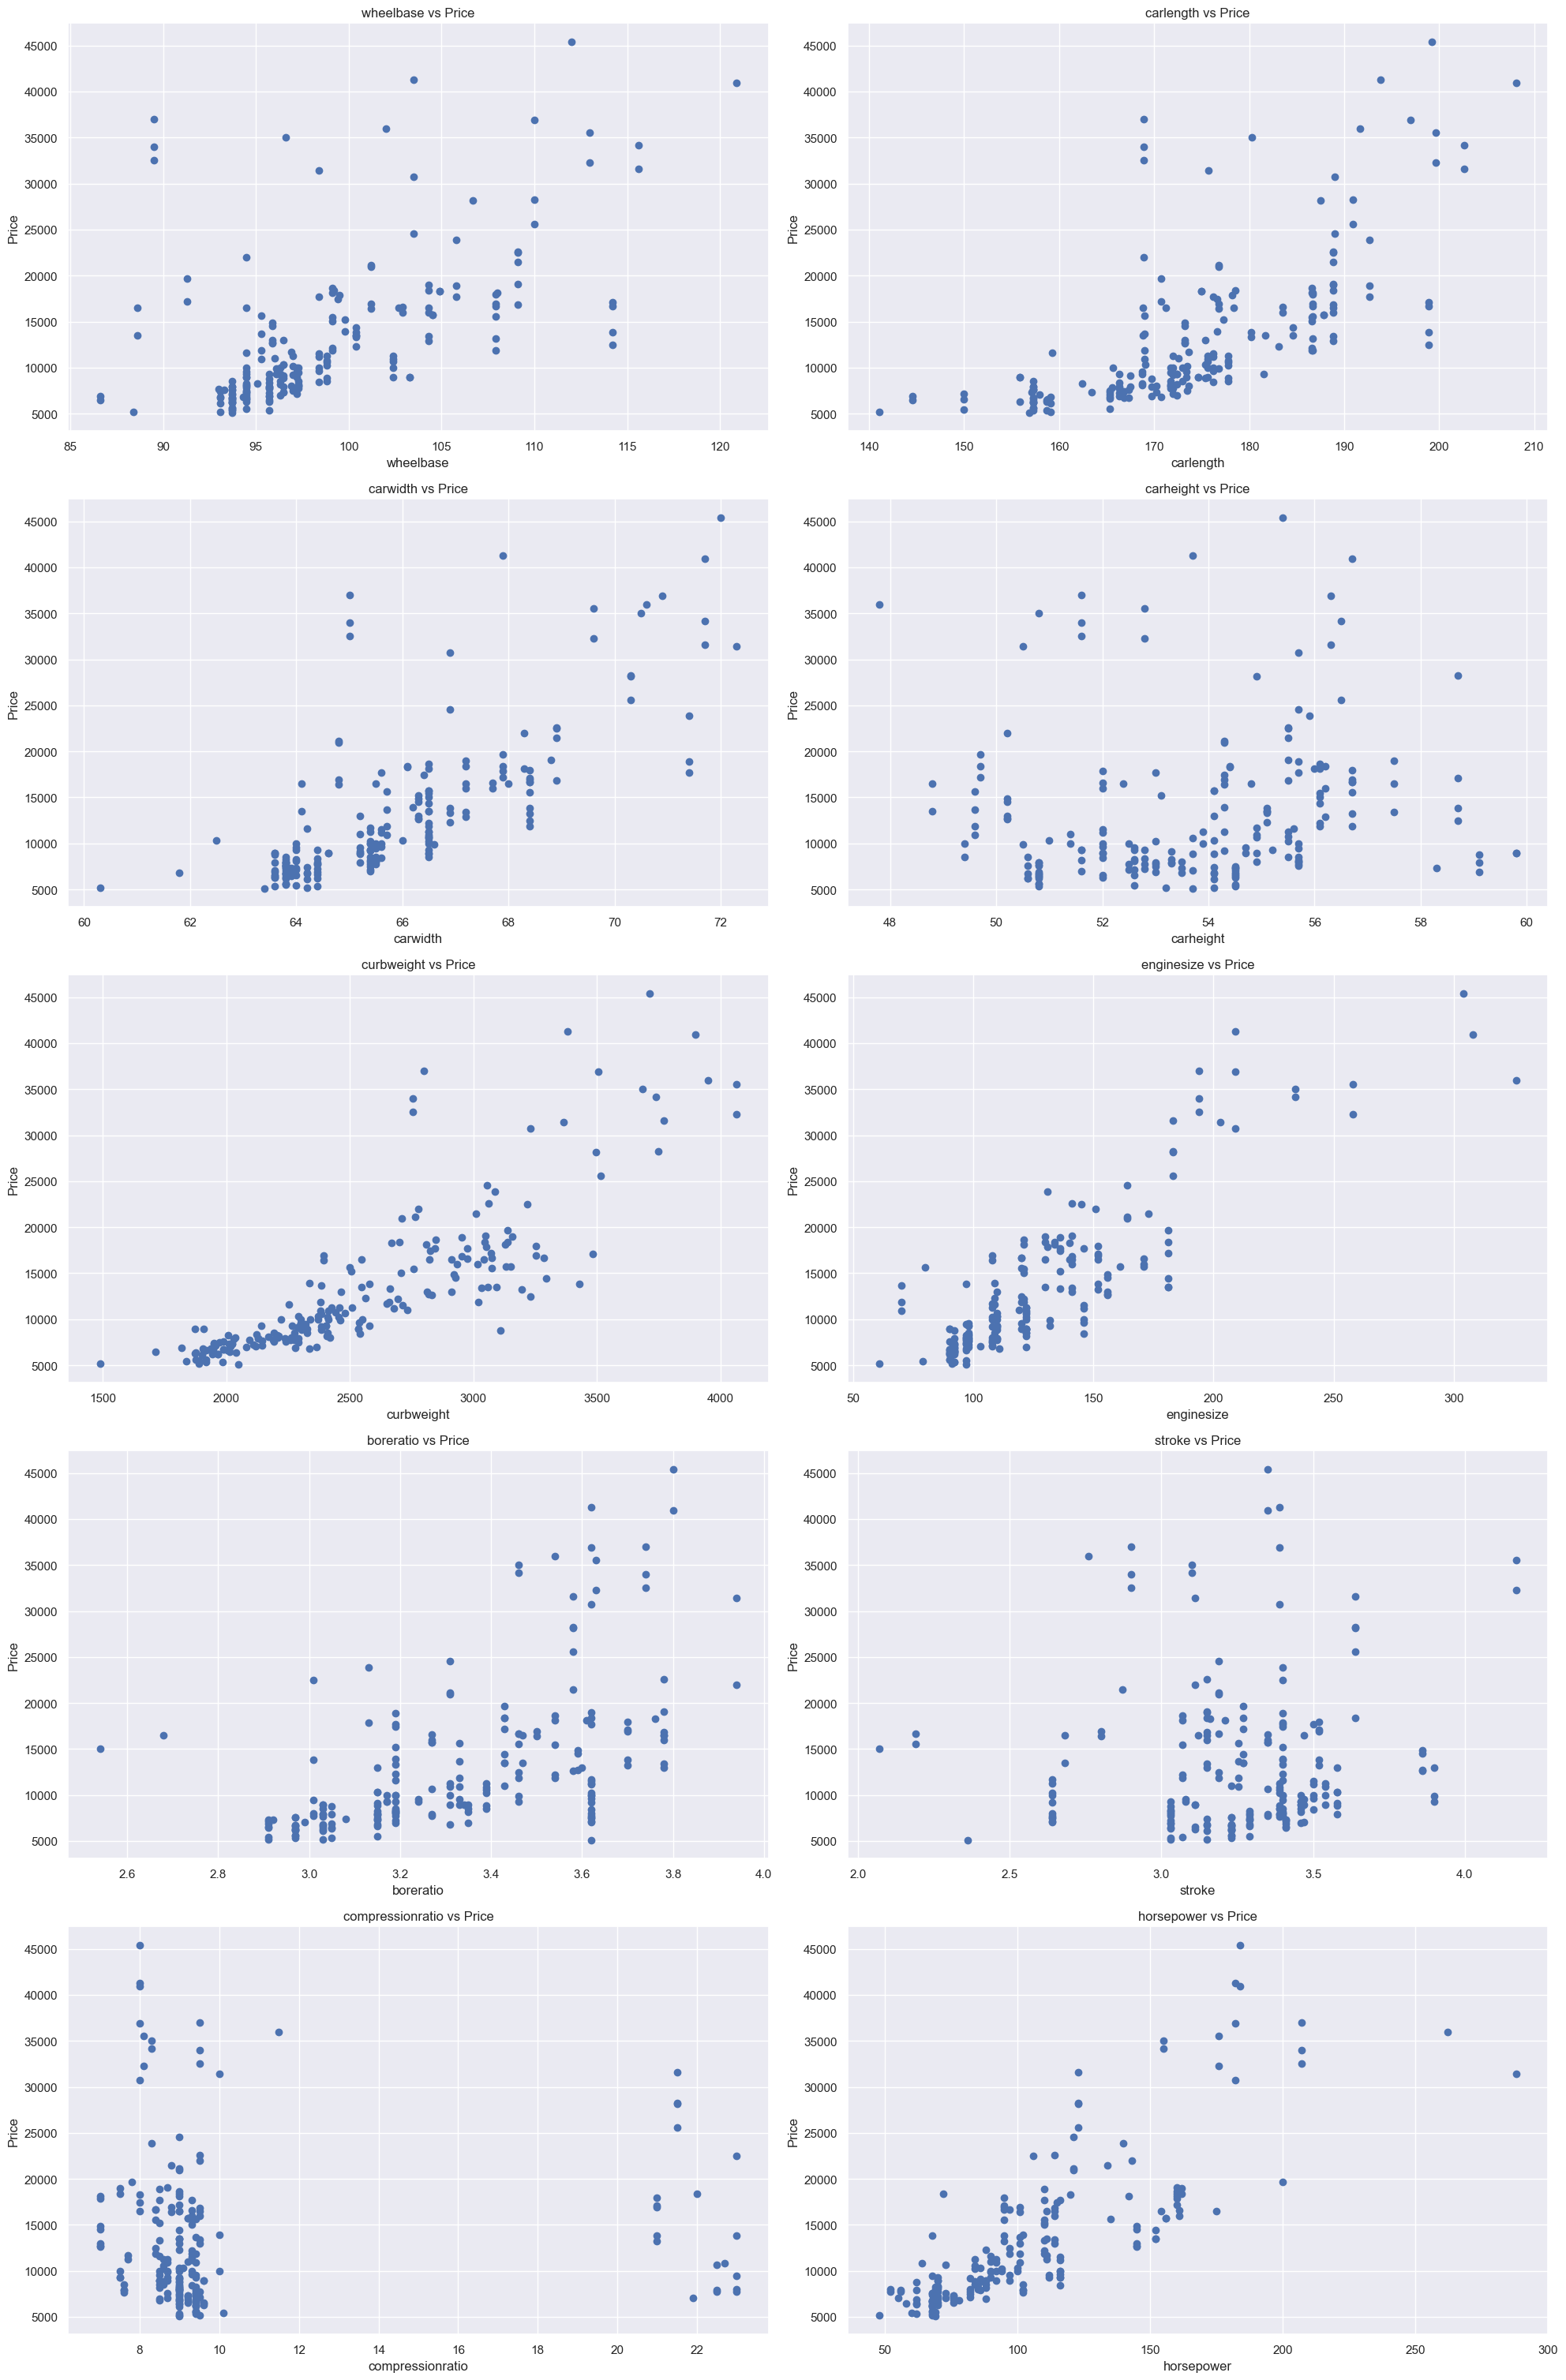

In [28]:
#Let's visualize the correlation of columns with price with a scatter plot
def scatter(x,fig):
    plt.subplot(10,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,60))

scatter('wheelbase', 1)
scatter('carlength', 2)
scatter('carwidth', 3)
scatter('carheight', 4)
scatter('curbweight', 5)
scatter('enginesize', 6)
scatter('boreratio', 7)
scatter('stroke', 8)
scatter('compressionratio', 9)
scatter('horsepower', 10)

plt.tight_layout()

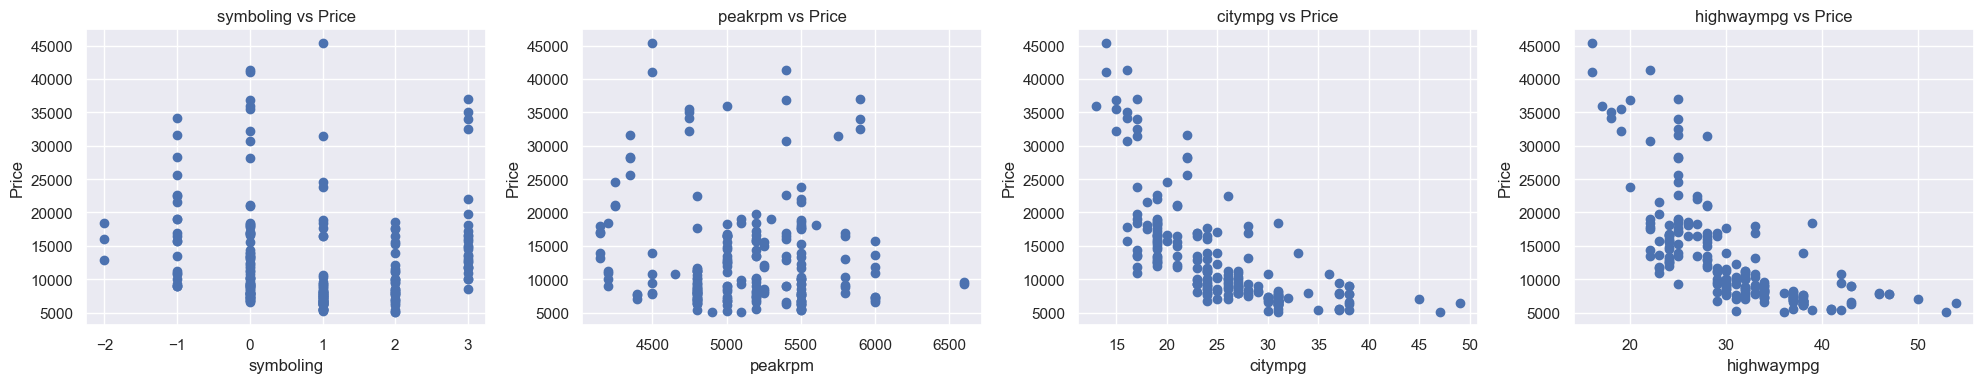

In [29]:
#Let's also visualize the negative correlation 
def scatter(x,fig):
    plt.subplot(1,4,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,4))

scatter('symboling', 1)
scatter('peakrpm', 2)
scatter('citympg', 3)
scatter('highwaympg', 4)

plt.tight_layout()

By looking at the correlation strenght and the scatter plot of different columns, we can conclude that the 
Significant variables are as follows

Positive Correlation (in descending order)
- enginesize (0.874145)
- curbweight(0.835305)
- horsepower (0.808139)
- carwidth (0.759325)
- carlength (0.682920)
- wheelbase(0.577816)
- boreratio (0.553173)

Negative Correlation (In descending order)
- citympg (-0.685751)
- highwaympg (-0.697599)

In [30]:
#let's take the significant variables columns only
linear_df = df[['price','enginesize','curbweight','horsepower','carwidth','carlength','wheelbase','boreratio','citympg','highwaympg']]
linear_df.head()

,price,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,citympg,highwaympg
0,13495.0,130,2548,111,64.1,168.8,88.6,3.47,21,27
1,16500.0,130,2548,111,64.1,168.8,88.6,3.47,21,27
2,16500.0,152,2823,154,65.5,171.2,94.5,2.68,19,26
3,13950.0,109,2337,102,66.2,176.6,99.8,3.19,24,30
4,17450.0,136,2824,115,66.4,176.6,99.4,3.19,18,22


In [65]:
df.describe(include='O')

,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,115,96,120,202,148,159,94


In [31]:
#We will also get the dummy variables (object variables)
df_dummy = pd.get_dummies(df[['CarBrand','fueltype','aspiration','doornumber','carbody','drivewheel',
                              'enginelocation','enginetype','cylindernumber']])

In [32]:
concat_df = pd.concat([linear_df, df_dummy], axis=1)
concat_df.head()

,price,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,citympg,highwaympg,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,130,2548,111,64.1,168.8,88.6,3.47,21,27,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,130,2548,111,64.1,168.8,88.6,3.47,21,27,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,152,2823,154,65.5,171.2,94.5,2.68,19,26,...,0,1,0,0,0,0,1,0,0,0
3,13950.0,109,2337,102,66.2,176.6,99.8,3.19,24,30,...,0,0,0,0,0,1,0,0,0,0
4,17450.0,136,2824,115,66.4,176.6,99.4,3.19,18,22,...,0,0,0,0,1,0,0,0,0,0


# Train-Test Split Price Prediction

In [42]:
#We will give X and y variables for train-testing and making price prediction
#Independent variable
X = concat_df.drop(['price'], axis=1)
#Dependent variable
y = concat_df['price']

In [43]:
#Scaling X with StandardScaler
scaler = StandardScaler()

In [44]:
X=scaler.fit_transform(X)
X

array([[ 0.07444893, -0.01456628,  0.17448278, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [ 0.07444893, -0.01456628,  0.17448278, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [ 0.60404617,  0.51488192,  1.26453643, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       ...,
       [ 1.10957081,  0.87875722,  0.75753473, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [ 0.43553795,  1.27343679,  0.04773235, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [ 0.33924755,  0.97502053,  0.25053303, ..., -0.070014  ,
        -0.070014  , -0.14106912]])

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [50]:
print(X_train.shape)
print(X_test.shape)

(153, 61)
(52, 61)


In [51]:
y_train

90      7099.0
173     8948.0
93      7349.0
5      15250.0
167     8449.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 153, dtype: float64

In [52]:
lr = LinearRegression()

In [53]:
#We will fit the X and y train to LinearRegression model
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
y_predictions=lr.predict(X_test)
print(y_predictions.shape)
print(y_test.shape)

(52,)
(52,)


In [55]:
accuracy_traindata=lr.score(X_train,y_train)
accuracy_traindata

0.9735583355273678

* Train data has an accuracy of 97.3%

In [82]:
accuracy_testdata=lr.score(X_test,y_test)
accuracy_testdata

0.8845324308005533

* Test data has accuracy of 88.4%

In [56]:
#Let's get the MSE, MAE, and R score
MSE=mean_squared_error(y_test,y_predictions)
MAE=mean_absolute_error(y_test,y_predictions)
R_squared=metrics.r2_score(y_test,y_predictions)

In [57]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [58]:
Adjusted_r_squared=model.rsquared_adj

In [59]:
R_squared

0.8845324308005533

In [60]:
Adjusted_r_squared

0.9470579017855603

# Conclusion

* With a high R_squared with 0.88 value and Adjusted R_squred with 0.94 indicates that we have a good model for predicting the target price value
